In [1]:
import pandas as pd
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np
import math
from scipy.stats import norm
from functools import reduce

In [2]:
m = loadmat('data/anomaly_detection_high_dim.mat')
data = m['X']
data_cv = m['Xval']
y_cv = m['yval']
del m
data[:10]

array([[ 6.65311366e+00,  1.36897016e+01,  1.75528453e+01,
        -1.19334974e+01, -5.75640883e+00,  1.54359213e+01,
        -1.21367520e+01,  8.22412257e+00, -4.88402408e+00,
         5.34933534e+00,  1.73513724e+01],
       [-5.63054206e+00, -1.89376673e+01,  1.86446242e+01,
        -6.15582498e+00, -2.59888637e+01,  1.54095532e+01,
        -1.65955163e+01,  9.45465367e+00, -2.87717344e+00,
        -6.00942041e+00,  1.92106361e+01],
       [ 9.72152507e+00, -9.98248898e+00,  1.55714341e+01,
        -3.22242657e+01, -5.59579923e+00,  2.43213827e+01,
         8.32773533e-01,  1.07945546e+01,  7.27574802e-01,
         1.03929750e+01,  7.08599490e+00],
       [-4.63576572e+00, -1.07160396e+01,  2.03565706e+01,
        -9.00209733e+00, -4.92056907e+00, -4.26195747e+00,
        -1.30582878e+00,  9.49980333e-01, -8.63410656e+00,
         1.98445438e-01,  6.77141253e-03],
       [-1.28410444e+01, -2.03883132e+01,  9.49193648e+00,
        -7.03850017e+00, -9.92108683e+00, -3.71610505e+00,
  

In [3]:
sigma2 = np.std(data, axis=0)
sigma2

array([7.80864225, 7.29422524, 7.64954003, 9.17627578, 8.07889793,
       9.46440054, 7.4587867 , 9.33607722, 5.44327735, 8.41339439,
       7.10658618])

In [4]:
mu = np.average(data, axis=0)
mu

array([  4.93940034,  -9.63726819,  13.81470749, -10.4644888 ,
        -7.95622922,  10.19950372,  -6.01940755,   7.96982896,
        -6.2531819 ,   2.32451289,   8.47372252])

In [5]:
dist = [
    norm(m, s)
    for (m, s) in zip(mu, sigma2)
]
dist

3.2080080040009995e-21


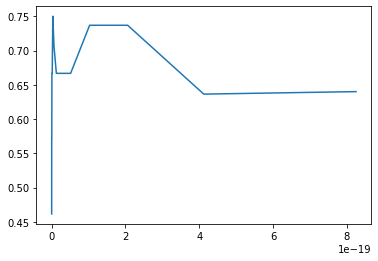

In [28]:
def compute_f1(threshold):
    tp = 0
    fp = 0
    fn = 0
    
    for row, y in zip(data_cv, y_cv):
        p = 1
        for i in range(0, len(dist)):
            p = p * dist[i].pdf(row[i])
        if p < threshold:
            if y == 1:
                tp = tp + 1
            else:
                fp = fp + 1
        elif y == 1:
            fn = fn + 1
        
    prec = tp / (tp + fp)
    rec = tp / (tp + fn)
    return (2 * prec * rec) / (prec + rec)


def plot_f1(step, mul_step=1, start=0, end=1):
    x_axis = []
    y_axis = []
    
    max_threshold = None
    max_threshold_value = None
    if start == 0:
        start = step
    threshold = start
    
    while threshold < end:
        x_axis.append(threshold)
        f1 = compute_f1(threshold)
        if max_threshold is None or f1 > max_threshold_value:
            max_threshold = threshold
            max_threshold_value = f1
        y_axis.append(f1)
        threshold = threshold + step + threshold * mul_step
        
    plt.plot(x_axis, y_axis)
    return max_threshold
         
threshold = plot_f1(0, 1.001, 1e-22, 1e-18)
print(threshold)
    

In [29]:
yh = [
    reduce(
        lambda a, b: a * b,
        [
            value_dist.pdf(value)
            for value, value_dist in zip(row, dist)
        ],
    ) < threshold
        
    for row in data
]

yh

#plt.scatter(x=data[:,0], y=data[:,1])
#plt.scatter(x=data[yh,0], y=data[yh,1])

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 F